In [60]:
import pandas as pd
import numpy as np
from sklearn import cluster, preprocessing, metrics
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [134]:
# train = pd.read_csv('data/train.txt', sep=r"\s+", header=None)
# test = pd.read_csv('data/test.txt', sep=r"\s+", header=None)
X_train = np.loadtxt("data/train.txt")
X_test = np.loadtxt("data/test.txt")
df = np.concatenate((X_train, X_test))
df

array([[ 0.28858451, -0.02029417, -0.13290514, ..., -0.84124676,
         0.17994061, -0.05862692],
       [ 0.27841883, -0.01641057, -0.12352019, ..., -0.8447876 ,
         0.18028889, -0.05431672],
       [ 0.27965306, -0.01946716, -0.11346169, ..., -0.84893347,
         0.18063731, -0.04911782],
       ...,
       [ 0.34996609,  0.03007744, -0.11578796, ..., -0.65535684,
         0.27447878,  0.18118355],
       [ 0.23759383,  0.01846687, -0.09649893, ..., -0.65971859,
         0.26478161,  0.18756291],
       [ 0.15362719, -0.01843651, -0.13701846, ..., -0.66008023,
         0.26393619,  0.1881034 ]])

In [135]:
y_train = np.loadtxt('data/train_labels.txt')
y_test = np.loadtxt('data/test_labels.txt')
y = np.concatenate((y_train, y_test))
y


array([5., 5., 5., ..., 2., 2., 2.])

In [31]:
np.unique(y, return_counts=True)

(array([1, 2, 3, 4, 5, 6], dtype=int64),
 array([1722, 1544, 1406, 1777, 1904, 1944], dtype=int64))

In [75]:
len(y)

10297

In [136]:
ss_scaler = preprocessing.StandardScaler()
df_scaled = ss_scaler.fit_transform(df)
df_scaled

array([[ 2.10533854e-01, -6.87026385e-02, -4.52194533e-01, ...,
        -6.74432366e-01,  3.82007658e-01, -1.61505480e-02],
       [ 6.02084832e-02,  3.59023537e-02, -2.75221885e-01, ...,
        -6.81359801e-01,  3.83147865e-01, -1.20627169e-04],
       [ 7.84597052e-02, -4.64269585e-02, -8.55480582e-02, ...,
        -6.89470939e-01,  3.84288531e-01,  1.92144041e-02],
       ...,
       [ 1.11821625e+00,  1.28805864e+00, -1.29414692e-01, ...,
        -3.10750224e-01,  6.91509049e-01,  8.75719123e-01],
       [-5.43492722e-01,  9.75327452e-01,  2.34319837e-01, ...,
        -3.19283719e-01,  6.59762215e-01,  8.99444350e-01],
       [-1.78515253e+00, -1.86663622e-02, -5.29759691e-01, ...,
        -3.19991245e-01,  6.56994458e-01,  9.01454465e-01]])

In [71]:
np.array(y).ravel()

array([5, 5, 5, ..., 2, 2, 2], dtype=int64)

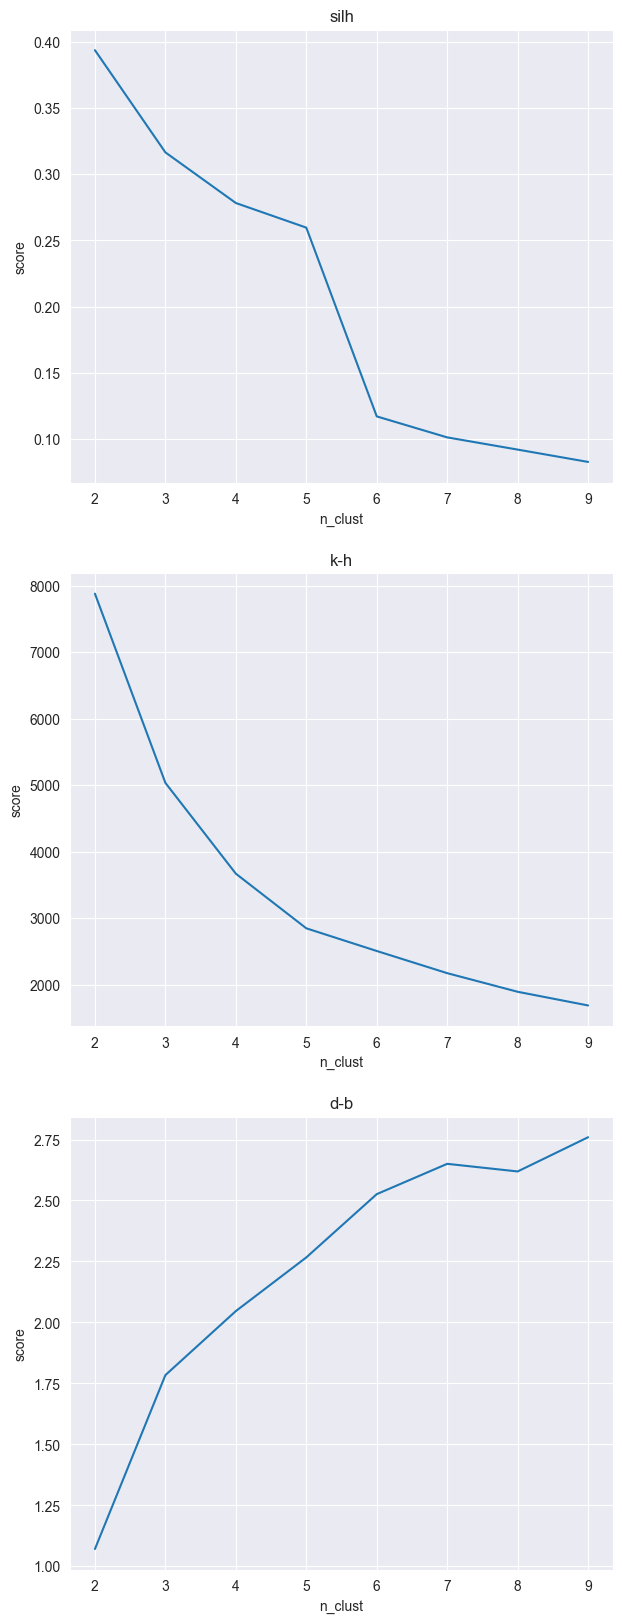

In [56]:
scores = {
    'silh': [],
    'k-h': [],
    'd-b': [],
}
for n in range(2,10):
    est = cluster.KMeans(n,n_init=1, random_state=42)
    preds = est.fit_predict(df_scaled)
    scores['silh'].append(metrics.silhouette_score(df_scaled,preds))
    scores['k-h'].append(metrics.calinski_harabasz_score(df_scaled,preds))
    scores['d-b'].append(metrics.davies_bouldin_score(df_scaled,preds))
fig, axes = plt.subplots(3, figsize=(7,20))
for i, item in enumerate(scores.items()):
    sns.lineplot(x=range(2,10), y=item[1], ax=axes[i]).set(xlabel='n_clust',ylabel='score',title=item[0])


2 - наилучший


base kmeans

In [137]:
kmeans = cluster.KMeans(random_state=42, n_clusters=6,init='random')
preds = kmeans.fit_predict(df_scaled)
metrics.homogeneity_completeness_v_measure(y,preds)

(0.5406994702303469, 0.5792825031740629, 0.559326399920236)

In [101]:
metrics.adjusted_rand_score(y, preds)

0.41962042580459846

In [125]:
df_lbl.groupby('y')['labels'].value_counts()

y    labels
1.0  1          897
     0          741
     4           84
2.0  1         1236
     0          297
     4            9
     2            2
3.0  0          882
     1          310
     4          214
4.0  5         1238
     2          447
     3           91
     1            1
5.0  5         1346
     2          560
6.0  3         1556
     2          329
     5           54
     1            5
Name: count, dtype: int64

In [147]:
#создаём таблицу сопряжённости
ct = pd.crosstab(y, kmeans.labels_)
#определяем название активностей
ct.index = ['ходьба', 'подъём', 'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,7))
ct

,1,2,3,4,5,6
ходьба,741,897,0,0,84,0
подъём,297,1236,2,0,9,0
спуск,882,310,0,0,214,0
сидение,0,1,447,91,0,1238
стояние,0,0,560,0,0,1346
лежание,0,5,329,1556,0,54


In [148]:
#определяем модель k-means
model= cluster.KMeans(n_clusters=6, init='random', random_state=42)
#обучаем модель
model.fit(df_scaled)
#вычисляем значение однородности
print(metrics.homogeneity_score(y, model.labels_))
#вычисляем значение полноты
print(metrics.completeness_score(y, model.labels_))
#вычисляем значение скорректированного индекса Рэнда
print(metrics.adjusted_rand_score(y, model.labels_))

0.5406994702303469
0.5792825031740629
0.41962042580459846


In [149]:
#создаём таблицу сопряжённости
ct = pd.crosstab(y, model.labels_)
#определяем название активностей
ct.index = ['ходьба', 'подъём', 
            'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,7))

In [150]:
ct

,1,2,3,4,5,6
ходьба,741,897,0,0,84,0
подъём,297,1236,2,0,9,0
спуск,882,310,0,0,214,0
сидение,0,1,447,91,0,1238
стояние,0,0,560,0,0,1346
лежание,0,5,329,1556,0,54
